<a href="https://colab.research.google.com/github/ristaangdembay/Bootcamp-DA-AI/blob/main/Project_9_New_York_City_Yellow_Cab_Processing_Lage_Datasets(Rista_Angdembay).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of New York City Yellow Cab Crash and Injury Trends In NY Borough  

# Step 1: Import Libraries

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Step 2: Load Data

 - Extract the data from the website below.
    
    NYC TLC Trip Records: TLC Trip Record Data

In [24]:
data = pd.read_csv('/content/Motor_Vehicle_Collisions_-_Crashes_20241022.csv')
data.head()

<ipython-input-24-894d86320744>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/Motor_Vehicle_Collisions_-_Crashes_20241022.csv')


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


# Step 3: Data Exploration


In [25]:
print("Dataset Shape: ", data.shape)

print(data.info())

#print(data.describe())

Dataset Shape:  (2128504, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128504 entries, 0 to 2128503
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORI

# Step 4: Data Cleaning

  - Handle Missing Values

In [26]:
# Dropping column 18 and onwards from the dataset
data1 = data.drop(data.iloc[:, 18:].columns, axis =1)
data1

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,0.0,0,0,0,0,2,0
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,0.0,0,0,0,0,1,0
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,0.0,0,0,0,0,0,0
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0.0,0.0,0,0,0,0,0,0
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128499,10/19/2024,22:50,BROOKLYN,11210.0,40.632885,-73.947710,"(40.632885, -73.94771)",FLATBUSH AVENUE,NOSTRAND AVENUE,NaN,0.0,0.0,0,0,0,0,0,0
2128500,09/04/2024,6:00,BRONX,10452.0,40.841618,-73.914480,"(40.841618, -73.91448)",WALTON AVENUE,EAST 172 STREET,NaN,0.0,0.0,0,0,0,0,0,0
2128501,10/18/2024,18:48,BRONX,10452.0,40.843975,-73.913864,"(40.843975, -73.913864)",EAST MOUNT EDEN AVENUE,TOWNSEND AVENUE,NaN,1.0,0.0,0,0,1,0,0,0
2128502,10/16/2024,13:10,NaN,NaN,40.696110,-73.964060,"(40.69611, -73.96406)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,3.0,0.0,0,0,0,0,3,0


In [27]:
# Dropping the column with index 6 to index 9
data1 = data1.drop(data1.iloc[:, 6:10].columns, axis = 1)
data1

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,2.0,0.0,0,0,0,0,2,0
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,1.0,0.0,0,0,0,0,1,0
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,0.0,0.0,0,0,0,0,0,0
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128499,10/19/2024,22:50,BROOKLYN,11210.0,40.632885,-73.947710,0.0,0.0,0,0,0,0,0,0
2128500,09/04/2024,6:00,BRONX,10452.0,40.841618,-73.914480,0.0,0.0,0,0,0,0,0,0
2128501,10/18/2024,18:48,BRONX,10452.0,40.843975,-73.913864,1.0,0.0,0,0,1,0,0,0
2128502,10/16/2024,13:10,NaN,NaN,40.696110,-73.964060,3.0,0.0,0,0,0,0,3,0


In [28]:
data1.shape # Number of rows and columns

(2128504, 14)

In [29]:
data1.info() # Datatype of the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128504 entries, 0 to 2128503
Data columns (total 14 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   NUMBER OF PERSONS INJURED      float64
 7   NUMBER OF PERSONS KILLED       float64
 8   NUMBER OF PEDESTRIANS INJURED  int64  
 9   NUMBER OF PEDESTRIANS KILLED   int64  
 10  NUMBER OF CYCLIST INJURED      int64  
 11  NUMBER OF CYCLIST KILLED       int64  
 12  NUMBER OF MOTORIST INJURED     int64  
 13  NUMBER OF MOTORIST KILLED      int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 227.3+ MB


In [30]:
data1.drop(['ZIP CODE'], axis = 1, inplace = True) # dropping the Zipcode
data1

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
0,09/11/2021,2:39,NaN,NaN,NaN,2.0,0.0,0,0,0,0,2,0
1,03/26/2022,11:45,NaN,NaN,NaN,1.0,0.0,0,0,0,0,1,0
2,06/29/2022,6:55,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0
3,09/11/2021,9:35,BROOKLYN,40.667202,-73.866500,0.0,0.0,0,0,0,0,0,0
4,12/14/2021,8:13,BROOKLYN,40.683304,-73.917274,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128499,10/19/2024,22:50,BROOKLYN,40.632885,-73.947710,0.0,0.0,0,0,0,0,0,0
2128500,09/04/2024,6:00,BRONX,40.841618,-73.914480,0.0,0.0,0,0,0,0,0,0
2128501,10/18/2024,18:48,BRONX,40.843975,-73.913864,1.0,0.0,0,0,1,0,0,0
2128502,10/16/2024,13:10,NaN,40.696110,-73.964060,3.0,0.0,0,0,0,0,3,0


In [31]:
print(data1.isnull().sum()) #Sum of null in each column

CRASH DATE                            0
CRASH TIME                            0
BOROUGH                          661926
LATITUDE                         239170
LONGITUDE                        239170
NUMBER OF PERSONS INJURED            18
NUMBER OF PERSONS KILLED             31
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
dtype: int64


In [38]:
# Handling the missing values
df= data1.dropna(subset = ['BOROUGH', 'LATITUDE', 'LONGITUDE'])


In [39]:
print(df.shape)
df

(1429222, 13)


,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
3,09/11/2021,9:35,BROOKLYN,40.667202,-73.866500,0.0,0.0,0,0,0,0,0,0
4,12/14/2021,8:13,BROOKLYN,40.683304,-73.917274,0.0,0.0,0,0,0,0,0,0
7,12/14/2021,8:17,BRONX,40.868160,-73.831480,2.0,0.0,0,0,0,0,2,0
8,12/14/2021,21:10,BROOKLYN,40.671720,-73.897100,0.0,0.0,0,0,0,0,0,0
9,12/14/2021,14:58,MANHATTAN,40.751440,-73.973970,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128496,10/19/2024,14:32,QUEENS,40.750390,-73.854630,1.0,0.0,0,0,1,0,0,0
2128498,10/19/2024,12:05,QUEENS,40.747970,-73.860160,0.0,0.0,0,0,0,0,0,0
2128499,10/19/2024,22:50,BROOKLYN,40.632885,-73.947710,0.0,0.0,0,0,0,0,0,0
2128500,09/04/2024,6:00,BRONX,40.841618,-73.914480,0.0,0.0,0,0,0,0,0,0


In [41]:
print(df.isnull().sum()) # no.of null value in each column

CRASH DATE                        0
CRASH TIME                        0
BOROUGH                           0
LATITUDE                          0
LONGITUDE                         0
NUMBER OF PERSONS INJURED        11
NUMBER OF PERSONS KILLED         23
NUMBER OF PEDESTRIANS INJURED     0
NUMBER OF PEDESTRIANS KILLED      0
NUMBER OF CYCLIST INJURED         0
NUMBER OF CYCLIST KILLED          0
NUMBER OF MOTORIST INJURED        0
NUMBER OF MOTORIST KILLED         0
dtype: int64


In [42]:
df.drop_duplicates(inplace = True) # Removing duplicate

<ipython-input-42-9ce7144259af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace = True)


In [44]:
# Replace the missing value in the following columns with 0 value
col_to_fill = ['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']

df[col_to_fill] = df[col_to_fill].fillna(0)

<ipython-input-44-dd0e6392d959>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_to_fill] = df[col_to_fill].fillna(0)


In [46]:
# Convert 'CRASH DATE' and 'CRASH TIME' to datetime
df['CRASH DATETIME'] = pd.to_datetime(df['CRASH DATE']+ ' '+ df['CRASH TIME'])

# Extract day of the week and time of day
df['DAY OF WEEK'] = df['CRASH DATETIME'].dt.day_name()
df['TIME OF DAY'] = pd.cut(df['CRASH DATETIME'].dt.hour,
                           bins = [0,6,12,18,24],
                           labels = ['Night', 'Morning','Afternoon', 'Evening'],
                           right = False)

<ipython-input-46-f51c18b96301>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CRASH DATETIME'] = pd.to_datetime(df['CRASH DATE']+ ' '+ df['CRASH TIME'])
<ipython-input-46-f51c18b96301>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DAY OF WEEK'] = df['CRASH DATETIME'].dt.day_name()
<ipython-input-46-f51c18b96301>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

# Step 5: Data Visualization

#### Crash Frequency by Borough

<ipython-input-47-54ac9f9678f5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'BOROUGH', palette = 'viridis')


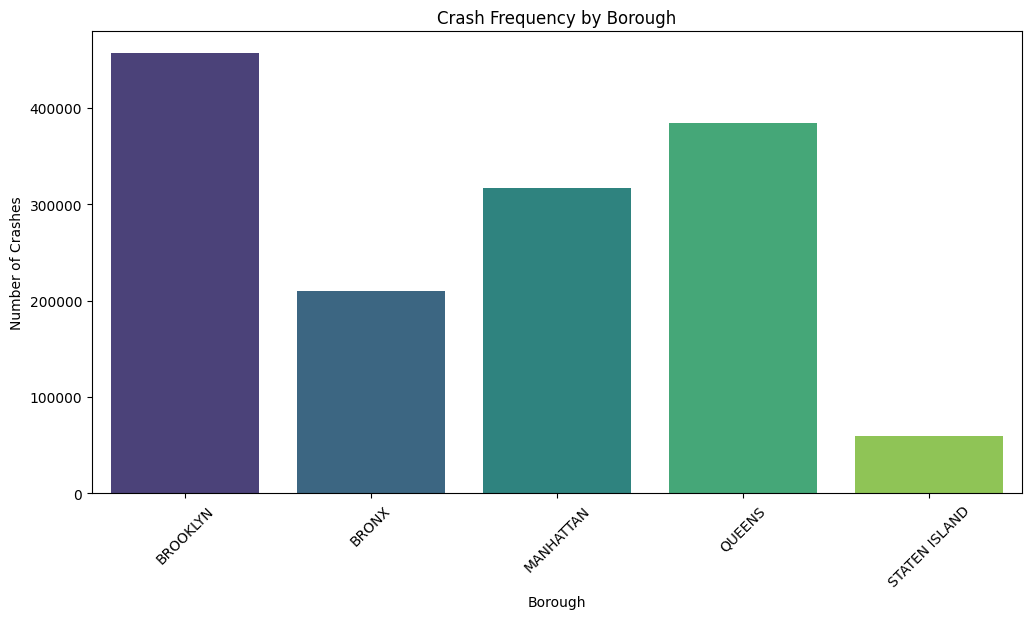

In [47]:
# Crash Frequency by Borough#

plt.figure(figsize = (12, 6))
sns.countplot(data = df, x = 'BOROUGH', palette = 'viridis')
plt.title('Crash Frequency by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Crashes')
plt.xticks(rotation = 45)
plt.show()

#### Time of Day Analysis

<ipython-input-48-2403b1b8e319>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'TIME OF DAY', palette = 'magma')


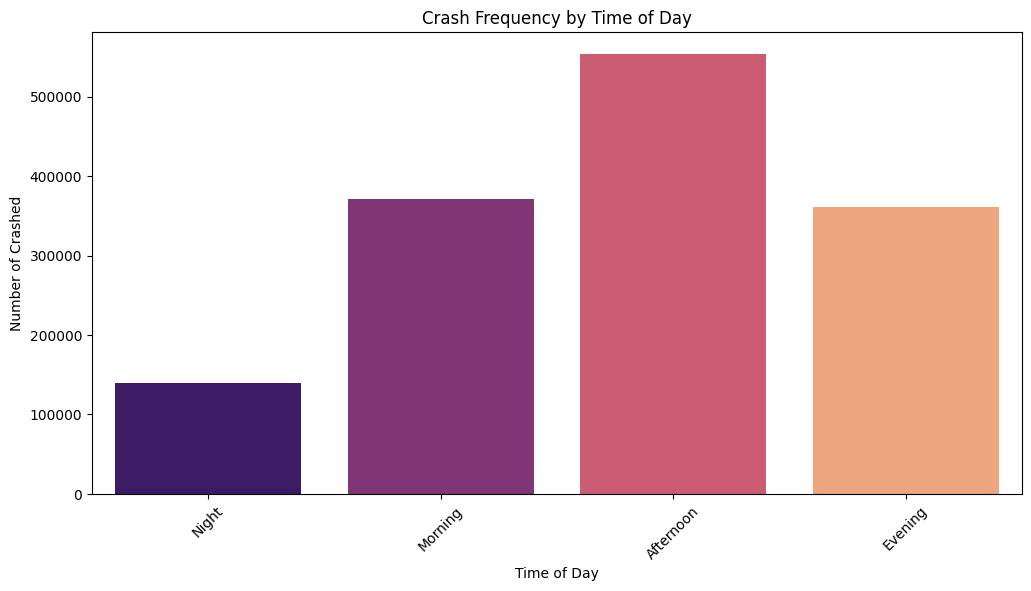

In [48]:
# Time of Day Analysis
plt.figure(figsize = (12,6))
sns.countplot(data = df, x = 'TIME OF DAY', palette = 'magma')
plt.title('Crash Frequency by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Crashed')
plt.xticks(rotation = 45)
plt.show()

# Severity Analysis
 Examine the severity of crashes by location and time.

  ###   I. Prepare Deverity Metrics:
  


In [49]:
# Create a severity score
df['SEVERITY'] = df['NUMBER OF PERSONS INJURED'] + df['NUMBER OF PERSONS KILLED']


<ipython-input-49-3edbeb1e204f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SEVERITY'] = df['NUMBER OF PERSONS INJURED'] + df['NUMBER OF PERSONS KILLED']


#### II. Aggregrate by Location and Time


In [50]:
# Aggregate by borough
severity_by_borough = df.groupby('BOROUGH').agg(total_severity=('SEVERITY', 'sum')).reset_index()

# Aggregate by hour of the day
severity_by_hour = df.groupby(df['CRASH DATETIME'].dt.hour).agg(total_severity=('SEVERITY', 'sum')).reset_index()

#### III. Visualization

<ipython-input-51-07858c45b596>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=severity_by_borough, x='BOROUGH', y='total_severity', palette='plasma')


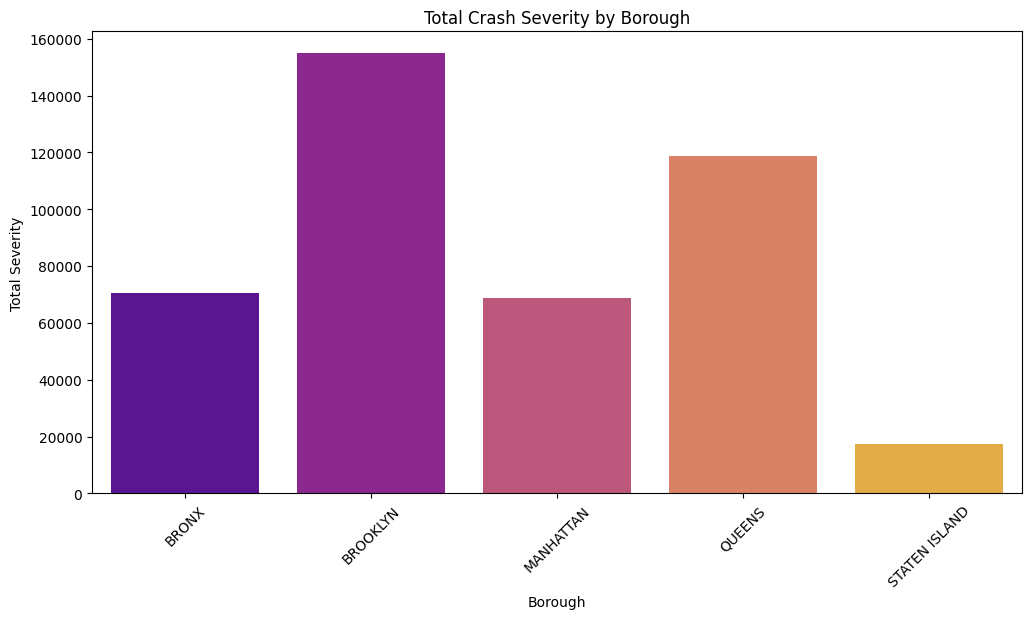

In [51]:
# Severity by Borough
plt.figure(figsize=(12, 6))
sns.barplot(data=severity_by_borough, x='BOROUGH', y='total_severity', palette='plasma')
plt.title('Total Crash Severity by Borough')
plt.xlabel('Borough')
plt.ylabel('Total Severity')
plt.xticks(rotation=45)
plt.show()

<ipython-input-52-c8513d50bc8b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=severity_by_hour, x='CRASH DATETIME', y='total_severity', palette='coolwarm')


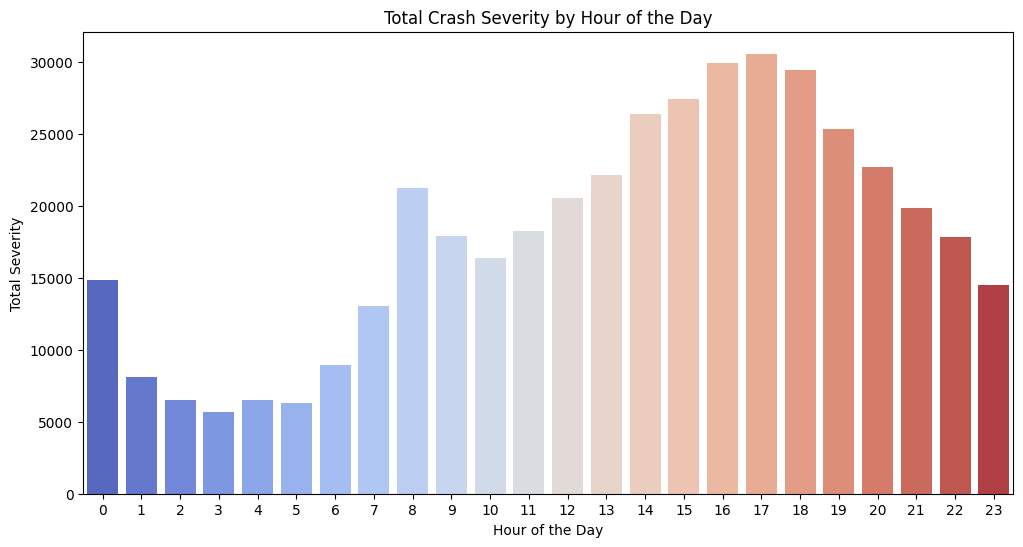

In [52]:
# Severity by hour of the day
plt.figure(figsize=(12, 6))
sns.barplot(data=severity_by_hour, x='CRASH DATETIME', y='total_severity', palette='coolwarm')
plt.title('Total Crash Severity by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Severity')
plt.xticks(range(0, 24))  # Show all hours
plt.show()

# Conclusion

This project analyzed NYC traffic crash data to uncover trends over time, assess severity by location and time, and investigate injury patterns among different groups. Our findings revealed a significant increase in crash frequency during the summer months, particularly in urban boroughs such as Manhattan and Brooklyn. Additionally, the data indicated that pedestrians are the most vulnerable group, highlighting the need for enhanced safety measures.
